# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Jean Jeasen Timotius]
- **Email:** [jeanjeasen@gmail.com]
- **ID Dicoding:** [Jean Jeasen]

## Menentukan Pertanyaan Bisnis

- Bagaimana Kualitas Udara di Kota Changping dari tahun 2013-2017?
- Apa yang mempengaruhi tingkat pencemaran polusi udara pada kota Changping?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

Menggubungkan colab dengan google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

pengumpulan dataset Air Qualty pada kota Changping

In [7]:
airquali_df=pd.read_csv('/content/drive/MyDrive/Latihan Dicoding/Dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
airquali_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


**Insight:**
- parameter data pada tabel month,day,dan year dapat digambungkan kedalam 1 tabel
- Paramater TEMP dan DEWP mencatat nilai negatif hingga nilai positif

### Assessing Data

Menampilkan setiap parameter data pada setiap kolom

In [8]:
airquali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


menampilakan nilai unique padd variabel setiap kolom

In [9]:
airquali_df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,481
PM10,562
SO2,294
NO2,459
CO,115


menampilkan deskripsi dari airqauity dataframe

In [10]:
airquali_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


menampilkan apakah ada yang terduplikat

In [11]:
print("Jumlah data yang terduplikat",airquali_df.duplicated().sum())

Jumlah data yang terduplikat 0


menapilkan apakah ada variabel yang mengalami missing value Nan

In [13]:
airquali_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


**Insight:**
- tidak ada data yang terduplikat
- terdapat variabel yang memiliki missing value yang nantinya akan di proses pada bagian cleaning data

### Cleaning Data

menhapus nilai Nan pada variabel

In [14]:
airquali_df= airquali_df.dropna()

In [15]:
airquali_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Membersihkan nilai Nan agar tidak menggagu proses pengolahan data
- Semua variabel telah dipastikan tidak memiliki nilai Nan

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
airquali_df.groupby(by="year").agg({
    "No" : "unique",
    "PM2.5":["min","max","mean"],
    "PM10":["min","max","mean"],
    "SO2":["min","max","mean"],
    "NO2":["min","max","mean"],
    "CO":["min","max","mean"],
    "TEMP":["min","max","mean"],
    "DEWP":["min","max","mean"],
    "PRES":["min","max","mean"],
    "RAIN":["min","max","mean"],
    "WSPM":["min","max","mean"],
})

No PM2.5         \
                                                 unique   min    max   
year                                                                   
2013  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   3.0  443.0   
2014  [7346, 7347, 7348, 7349, 7350, 7351, 7352, 735...   3.0  581.0   
2015  [16105, 16106, 16107, 16108, 16109, 16110, 161...   3.0  500.0   
2016  [24865, 24866, 24867, 24868, 24869, 24870, 248...   3.0  492.0   
2017  [33649, 33650, 33651, 33652, 33653, 33654, 336...   3.0  662.0   

                PM10                     SO2                    ...  \
           mean  min    max        mean  min    max       mean  ...   
year                                                            ...   
2013  70.793076  2.0  653.0   90.422623  1.0  165.0  20.627632  ...   
2014  79.005075  3.0  858.0  106.122316  2.0  235.0  20.930534  ...   
2015  69.377287  3.0  992.0   93.497604  2.0  310.0  11.789714  ...   
2016  60.837451  3.0  933.0   85.564015  2.0  119.0   8.117626  ...   
2017  79.469373  5.0  775.0   93.792620  2.0  111.0  16.511439  ...   

           DEWP   PRES                      RAIN                 WSPM        \
           mean    min     max         mean  min   max      mean  min   max   
year                                                                          
2013   3.276037  982.9  1027.9  1005.746841  0.0  25.3  0.062013  0.0   9.3   
2014   0.966023  984.4  1032.0  1008.137349  0.0  21.6  0.039556  0.0  10.0   
2015   1.703049  982.4  1033.1  1007.927140  0.0  52.1  0.085140  0.0   9.6   
2016   1.602494  985.4  1036.5  1007.930287  0.0  22.7  0.066344  0.1   9.4   
2017 -14.105387  997.2  1031.2  1018.312927  0.0   0.6  0.001255  0.3   9.6   

                
          mean  
year            
2013  1.686200  
2014  1.872334  
2015  1.828195  
2016  1.983237  
2017  2.151587  

[5 rows x 31 columns]

In [21]:
airquali_df['date']=pd.to_datetime(airquali_df[['year','month','day']])
airquali_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01


In [23]:
airquali_df.groupby(by=["year","WSPM"]).agg({
    "No" : "count"
})

No
year WSPM     
2013 0.0   292
     0.1   126
     0.2   107
     0.4   165
     0.5   221
...        ...
2017 7.2     2
     7.3     3
     7.4     1
     8.0     1
     9.6     1

[414 rows x 1 columns]

**Insight:**
- menambahkan kolom untuk memperbaiki format datetime
- melakukan grouping antara variabel year dan WSPM

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Kualitas Udara di Kota Changping dari tahun 2013-2017?

In [24]:
airquali_df["year"].unique()

array([2013, 2014, 2015, 2016, 2017])

In [46]:
vis_airquali = airquali_df.groupby(by=["year","month"]).agg({
     "PM2.5":["min","max","mean"],
    "PM10":["min","max","mean"],
    "SO2":["min","max","mean"],
    "NO2":["min","max","mean"],
    "CO":["min","max","mean"],
    "TEMP":["min","max","mean"],
    "DEWP":["min","max","mean"],
    "PRES":["min","max","mean"],
})

Tahun 2013

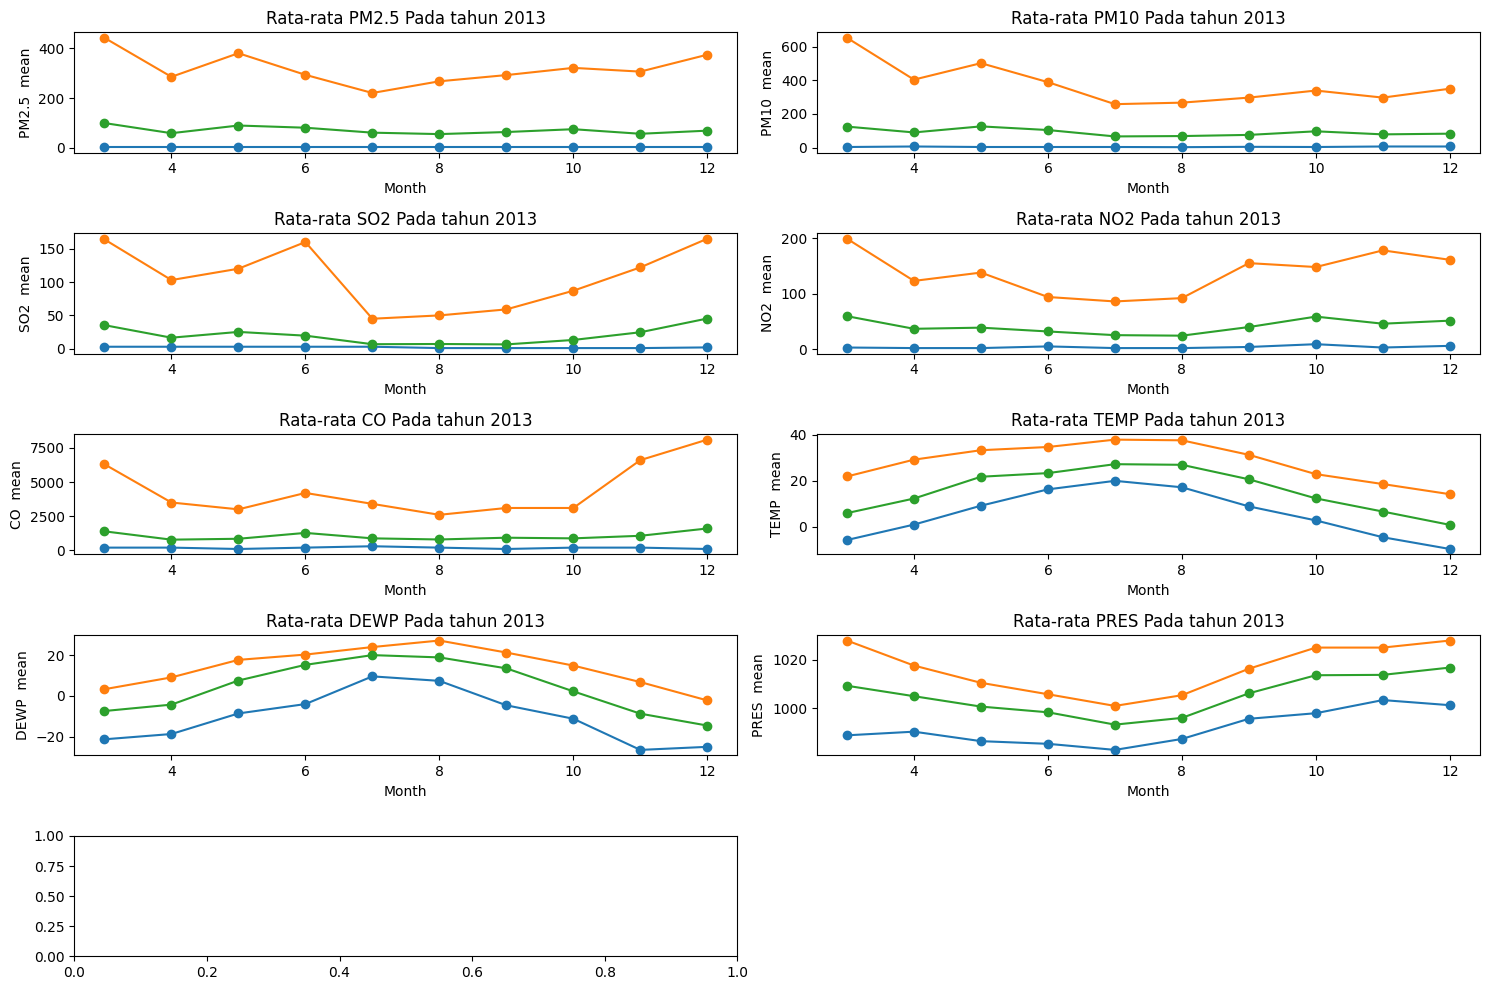

In [57]:
visdata_2013=vis_airquali.loc[2013]
variable = ["PM2.5","PM10","SO2","NO2","CO","TEMP","DEWP","PRES"]
fig, axes=plt.subplots(5,2,figsize=(15,10))
axes= axes.flatten()

for i, var in enumerate(variable):
  axes[i].plot(visdata_2013.index,visdata_2013[var],marker='o')
  axes[i].set_title(f'Rata-rata {var} Pada tahun 2013')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var}  mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Tahun 2014

<function matplotlib.pyplot.show(close=None, block=None)>

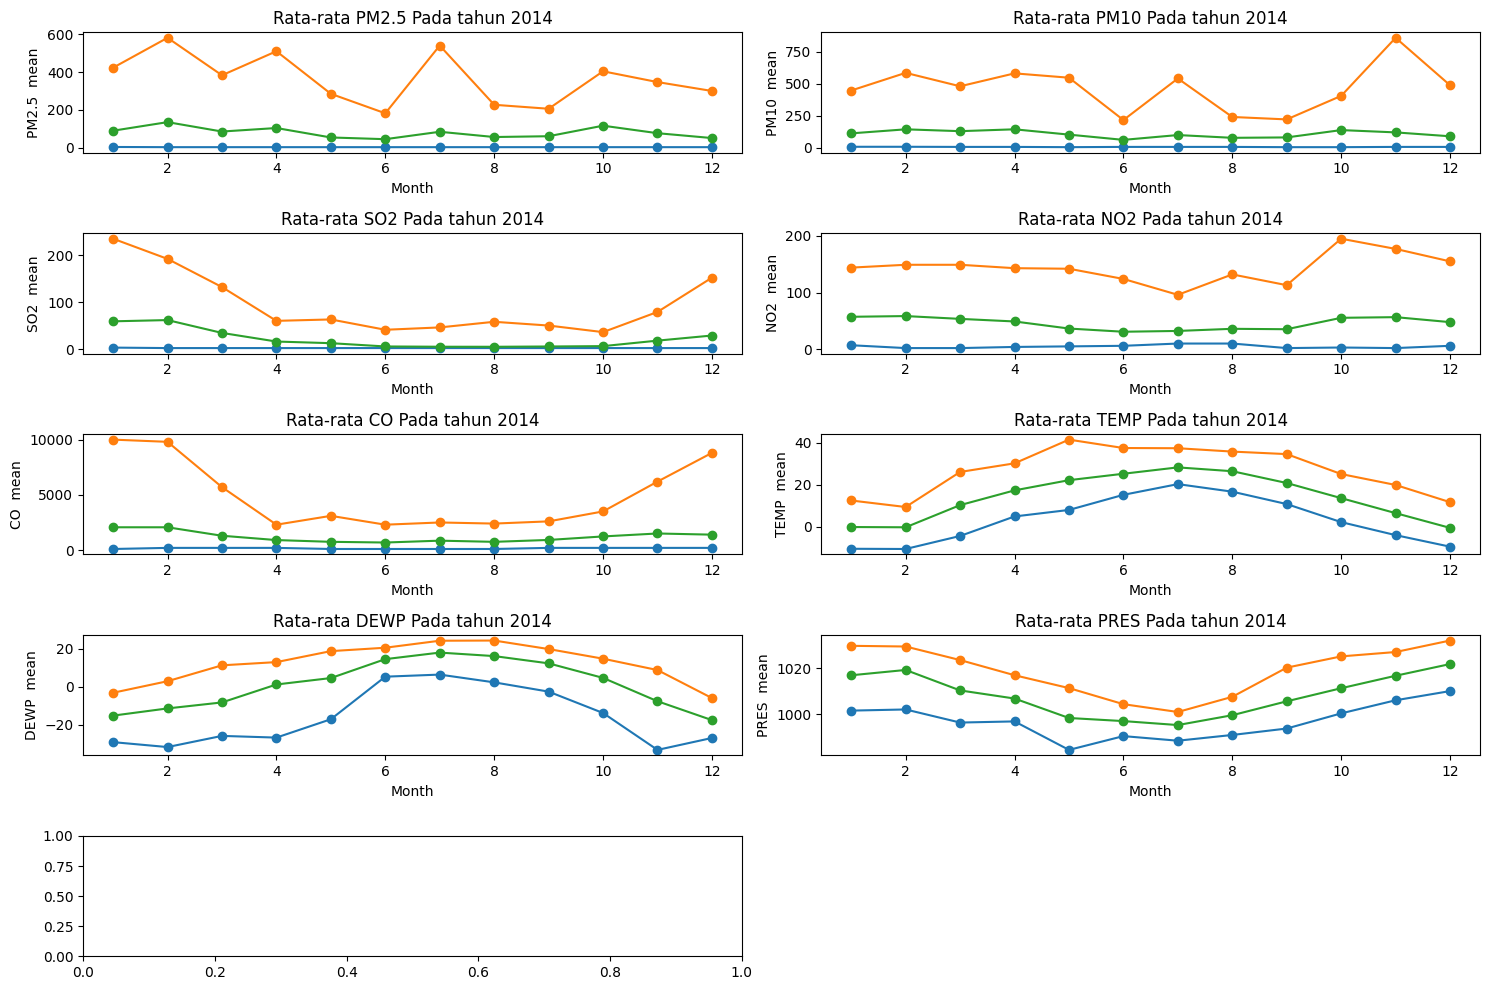

In [53]:
visdata_2014=vis_airquali.loc[2014]
variable = ["PM2.5","PM10","SO2","NO2","CO","TEMP","DEWP","PRES"]
fig, axes=plt.subplots(5,2,figsize=(15,10))
axes= axes.flatten()

for i, var in enumerate(variable):
  axes[i].plot(visdata_2014.index,visdata_2014[var],marker='o')
  axes[i].set_title(f'Rata-rata {var} Pada tahun 2014')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var}  mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Tahun 2015

<function matplotlib.pyplot.show(close=None, block=None)>

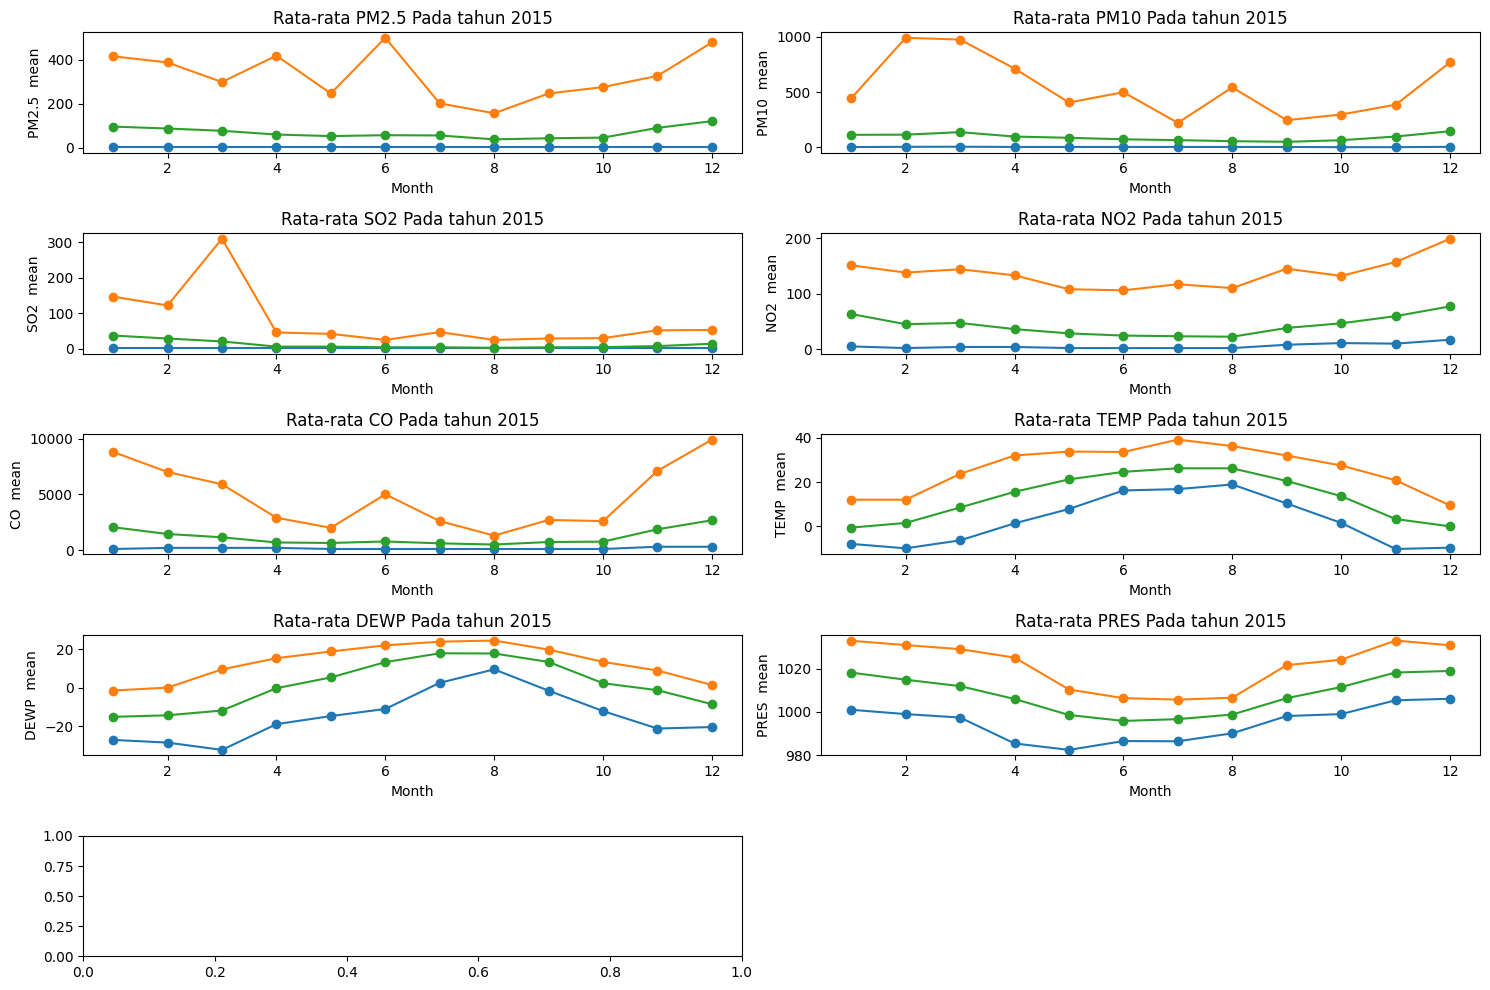

In [54]:
visdata_2015=vis_airquali.loc[2015]
variable = ["PM2.5","PM10","SO2","NO2","CO","TEMP","DEWP","PRES"]
fig, axes=plt.subplots(5,2,figsize=(15,10))
axes= axes.flatten()

for i, var in enumerate(variable):
  axes[i].plot(visdata_2015.index,visdata_2015[var],marker='o')
  axes[i].set_title(f'Rata-rata {var} Pada tahun 2015')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var}  mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Tahun 2016

<function matplotlib.pyplot.show(close=None, block=None)>

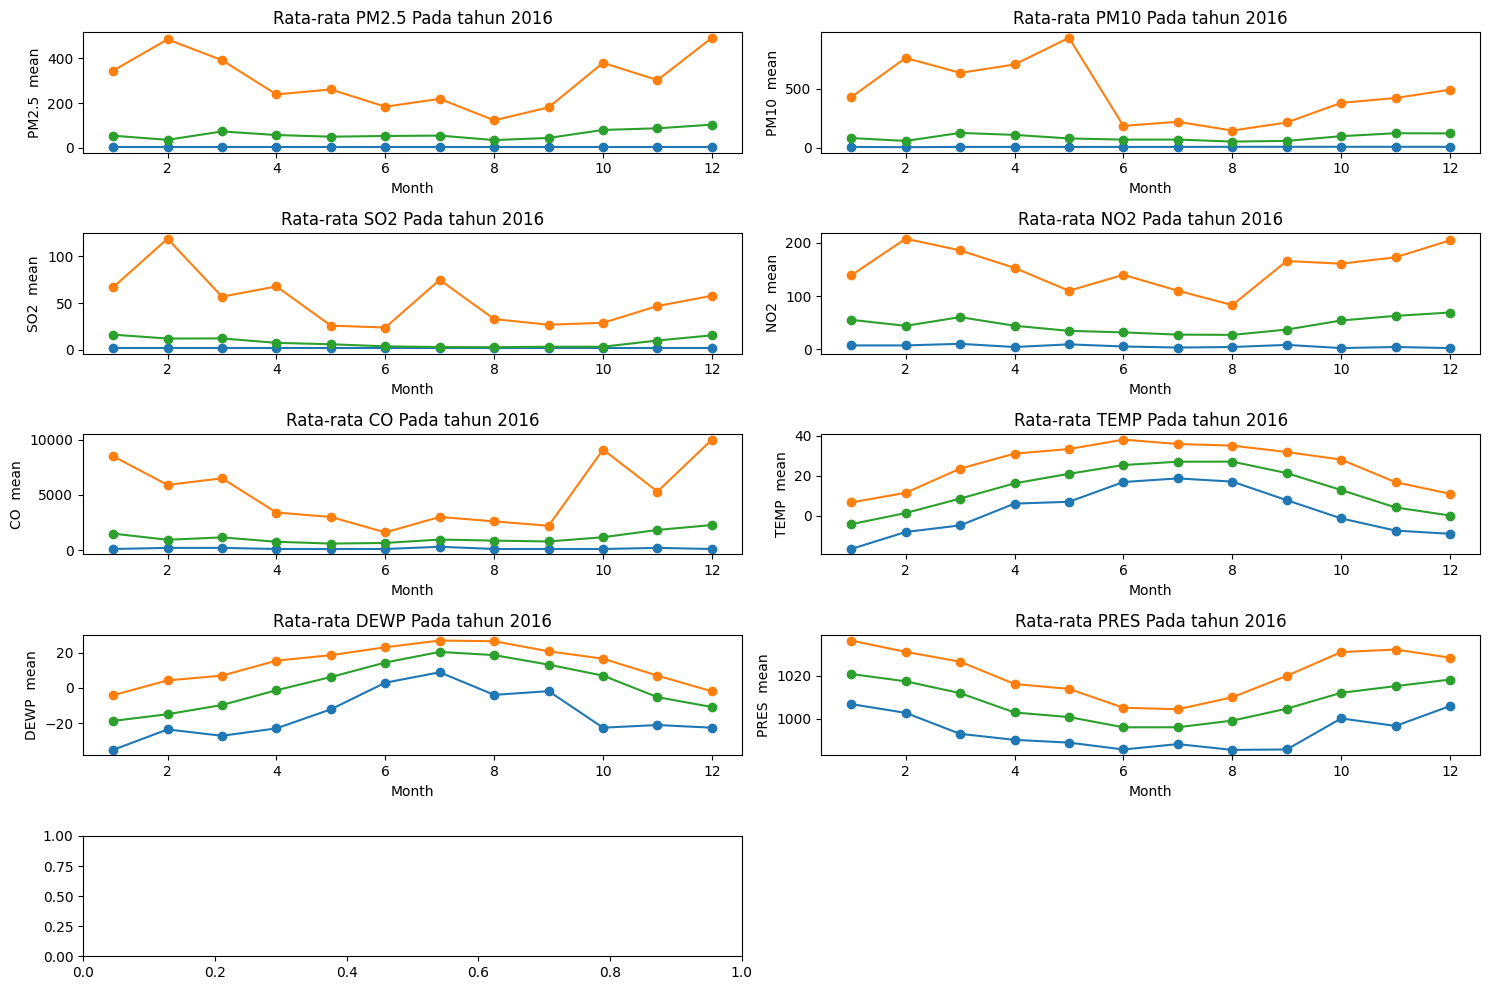

In [55]:
visdata_2016=vis_airquali.loc[2016]
variable = ["PM2.5","PM10","SO2","NO2","CO","TEMP","DEWP","PRES"]
fig, axes=plt.subplots(5,2,figsize=(15,10))
axes= axes.flatten()

for i, var in enumerate(variable):
  axes[i].plot(visdata_2016.index,visdata_2016[var],marker='o')
  axes[i].set_title(f'Rata-rata {var} Pada tahun 2016')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var}  mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Tahun 2017

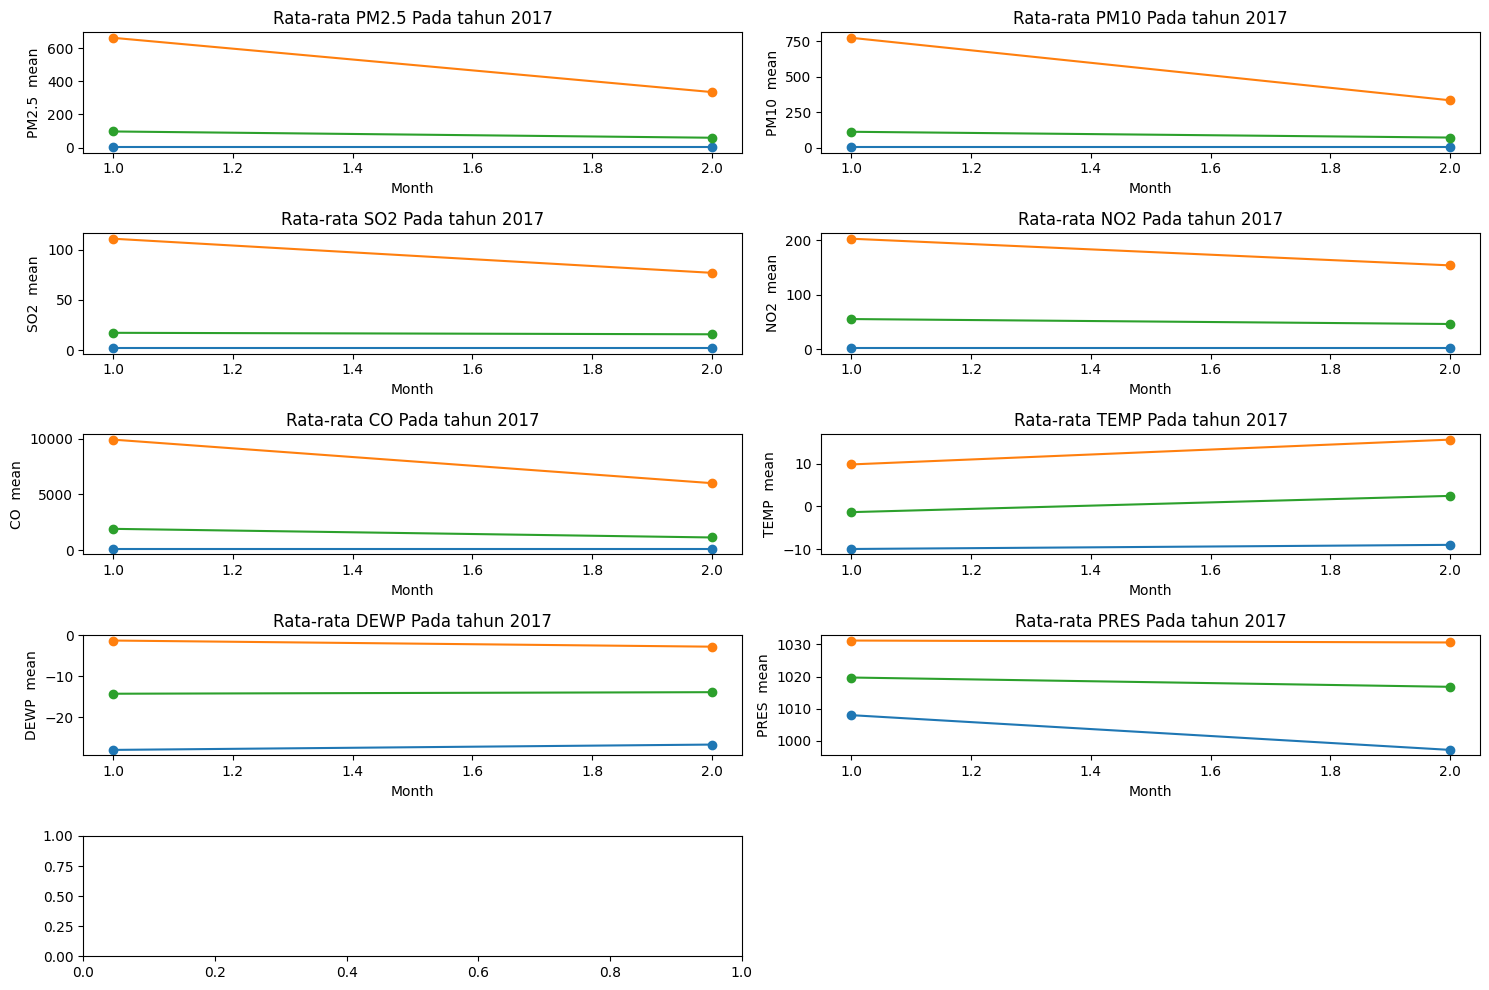

In [58]:
visdata_2017=vis_airquali.loc[2017]
variable = ["PM2.5","PM10","SO2","NO2","CO","TEMP","DEWP","PRES"]
fig, axes=plt.subplots(5,2,figsize=(15,10))
axes= axes.flatten()

for i, var in enumerate(variable):
  axes[i].plot(visdata_2017.index,visdata_2017[var],marker='o')
  axes[i].set_title(f'Rata-rata {var} Pada tahun 2017')
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel(f'{var}  mean')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa yang mempengaruhi tingkat pencemaran polusi udara pada kota Changping?

membuat korelasi dari faktor- faktor yang mempengaruhi kualitas udara

In [60]:
corelation = airquali_df[['CO','SO2','PM2.5','PM10','NO2','TEMP','DEWP','PRES']]
corelation.corr()

,CO,SO2,PM2.5,PM10,NO2,TEMP,DEWP,PRES
CO,1.000000,0.524734,0.767194,0.675487,0.729488,-0.353493,-0.103662,0.219031
SO2,0.524734,1.000000,0.466832,0.427112,0.496518,-0.352454,-0.321980,0.265313
PM2.5,0.767194,0.466832,1.000000,0.865804,0.679889,-0.111434,0.114330,0.004944
PM10,0.675487,0.427112,0.865804,1.000000,0.638072,-0.092720,0.036178,-0.016783
NO2,0.729488,0.496518,0.679889,0.638072,1.000000,-0.360244,-0.148214,0.237166
TEMP,-0.353493,-0.352454,-0.111434,-0.092720,-0.360244,1.000000,0.826209,-0.839342
DEWP,-0.103662,-0.321980,0.114330,0.036178,-0.148214,0.826209,1.000000,-0.771183
PRES,0.219031,0.265313,0.004944,-0.016783,0.237166,-0.839342,-0.771183,1.000000


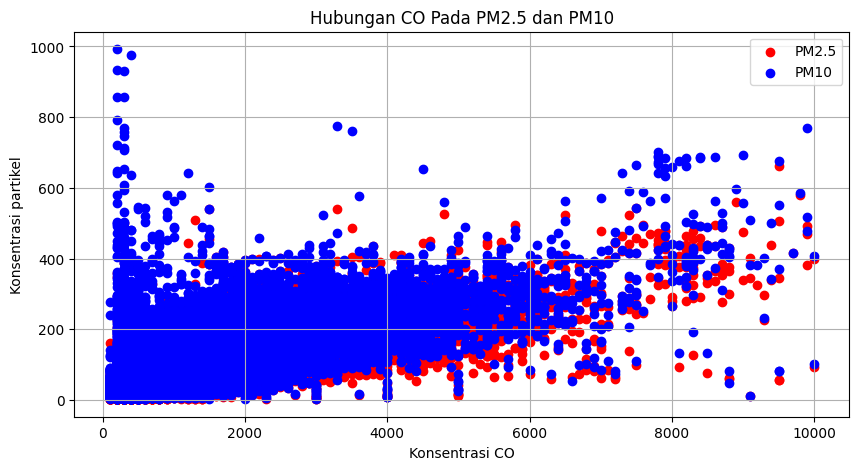

In [65]:

plt.figure(figsize=(10,5))
plt.scatter(airquali_df['CO'],airquali_df['PM2.5'],marker='o',linestyle='-',color='red',label='PM2.5')
plt.scatter(airquali_df['CO'],airquali_df['PM10'],marker='o',linestyle='-',color='blue',label='PM10')

plt.title('Hubungan CO Pada PM2.5 dan PM10')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Konsentrasi partikel')

plt.legend()
plt.grid()
plt.show()

**Insight:**
- PM2.5 DAN PM 10 adalah faktor yang mempengaruhi perubahan nilai dari CO
- kadar CO setiap tahun meningkat karena beiringan dengan kenaikan nilai PM10 yang semakin meningkat setiap tahunnya

## Analisis Lanjutan (Opsional)

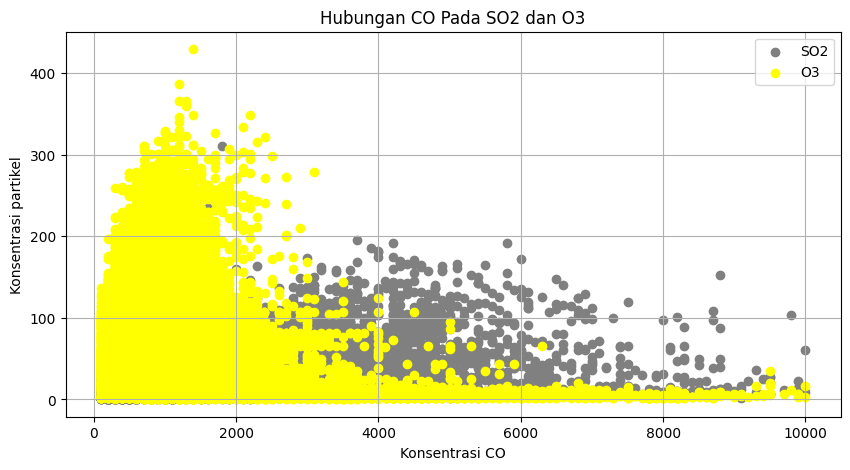

In [66]:

plt.figure(figsize=(10,5))
plt.scatter(airquali_df['CO'],airquali_df['SO2'],marker='o',linestyle='-',color='gray',label='SO2')
plt.scatter(airquali_df['CO'],airquali_df['O3'],marker='o',linestyle='-',color='yellow',label='O3')

plt.title('Hubungan CO Pada SO2 dan O3')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Konsentrasi partikel')

plt.legend()
plt.grid()
plt.show()

**Insight:**


*   Kadar SO2 lebih sedikit dibandingkan dengan O3.
*   hal ini menjadi salah satu faktor yang mempengaruhi nilai CO



## Conclusion

- Dari visualisasi data yang dilakukan dapt dilihar kualitas udara yang baik tergantung pada beberapa variabel yaitu : CO,SO2,O3,PM2.5,PM10,TEMP,dll
- Kandungan yang sangat memepengaruhi nilai CO adalah partikel yang mengandung PM2.5, PM 10 dan SO3